🔹 Step 1: Load data

In [1]:
import xarray as xr
import numpy as np
from pathlib import Path

data_path = Path("../data/sst_2024.nc")
ds = xr.open_dataset(data_path)
sst = ds["sst"]  # shape: (time, lat, lon)

lats = ds["lat"].values
lons = ds["lon"].values

🔹 Step 2: Set patch extraction parameters

In [2]:
PATCH_SIZE = 64
NUM_PATCHES = 5000  # or whatever you want
NAN_THRESHOLD = 0.1  # max % of NaNs allowed in a patch

lat_size = sst.shape[1]
lon_size = sst.shape[2]

🔹 Step 3: Extract patches

In [3]:
patches = []
coords = []

for _ in range(NUM_PATCHES):
    t = np.random.randint(0, sst.shape[0])
    i = np.random.randint(0, lat_size - PATCH_SIZE)
    j = np.random.randint(0, lon_size - PATCH_SIZE)

    patch = sst[t, i:i+PATCH_SIZE, j:j+PATCH_SIZE].values

    if np.isnan(patch).mean() > NAN_THRESHOLD:
        continue  # skip patch with too many NaNs

    patches.append(patch)

    lat_center = lats[i + PATCH_SIZE // 2]
    lon_center = lons[j + PATCH_SIZE // 2]
    coords.append([lat_center, lon_center])

patches = np.stack(patches)
print(f"Extracted {patches.shape[0]} valid patches of shape {patches.shape[1:]}")

Extracted 2399 valid patches of shape (64, 64)


🔹 Step 4: Save to disk

In [4]:
output_path = Path("../data/patches")
output_path.mkdir(exist_ok=True)

np.save(output_path / "sst_patches_64x64.npy", patches)
np.save(output_path / "sst_patch_coords.npy", np.array(coords))
print("✅ Saved patch data!")

✅ Saved patch data!


🔹Visualize a random patch

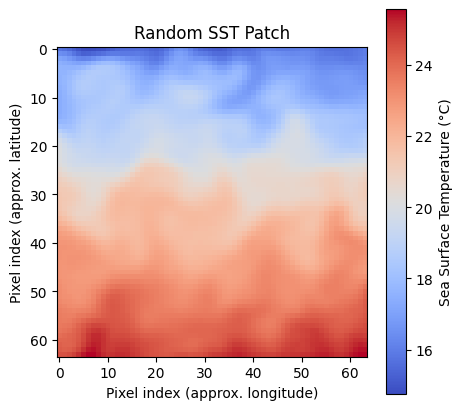

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

project_root = Path("..").resolve()

patch = patches[np.random.randint(0, len(patches))]

plt.figure(figsize=(5, 5))
plt.imshow(patch, cmap="coolwarm")
cbar = plt.colorbar()
cbar.set_label("Sea Surface Temperature (°C)")
plt.title("Random SST Patch")
plt.xlabel("Pixel index (approx. longitude)")
plt.ylabel("Pixel index (approx. latitude)")
plt.savefig(project_root / "results" / "figures" / "Random_SST_Patch.png", dpi=300, bbox_inches="tight")
plt.show()
